# Customer Churn Prediction using Machine Learning

## Problem Statement
Customer churn is a critical issue in the telecom industry. The objective of this project is to build a machine learning model that predicts whether a customer is likely to leave the service based on demographic details, service usage, and billing information.

## Dataset
Telco Customer Churn Dataset containing customer demographics, account information, and service details.

## Objective
- Perform data preprocessing and feature encoding
- Build a churn prediction model using Logistic Regression
- Evaluate model performance using classification metrics


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

## Dataset Overview
- Target Variable: `Churn`
- Categorical Features: Gender, InternetService, Contract, PaymentMethod, etc.
- Numerical Features: Tenure, MonthlyCharges, TotalCharges

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


This visualization shows the distribution of churned vs retained customers, highlighting potential class imbalance in the dataset.


C:\Users\Admin\AppData\Local\Temp\ipykernel_9340\897289836.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{churn_percent[i]:.1f}%",


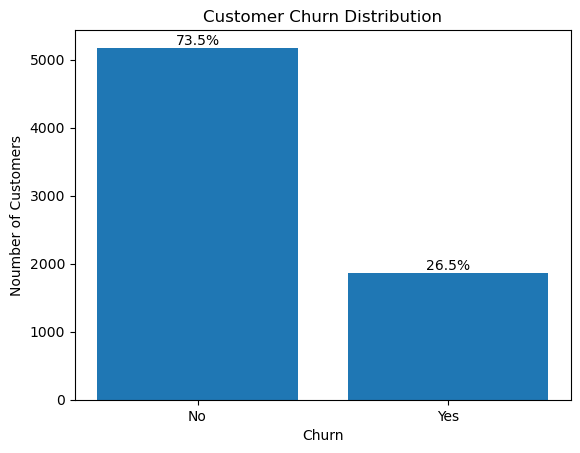

In [6]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts/churn_counts.sum()*100

plt.figure()
bars = plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Noumber of Customers')
plt.title('Customer Churn Distribution')
for i, bar in enumerate(bars):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{churn_percent[i]:.1f}%",
        ha = 'center',
        va = 'bottom'
    )
plt.show()

In [7]:
#Checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Cleaning
- `TotalCharges` contained blank values for new customers.
- Converted the column to numeric format and handled missing values.

In [9]:
#Data types (categorical vs numerical)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

## Feature Engineering
Categorical features were encoded to numerical values to make them suitable for machine learning models.

In [10]:
# List categorical columns
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols.remove('customerID')
cat_cols.remove('Churn')

In [11]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [12]:
# Encode target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes':1, 'No':0})

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

## Train-Test Split
The dataset was split into training and testing sets to evaluate model performance on unseen data.


In [14]:
# Train test split
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Feature engineering

In [16]:
# Tenure Group (Binning)
df_encoded['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,72], labels=[1,2,3,4,5])

In [17]:
df_encoded[['tenure','tenure_group']].head(10)

,tenure,tenure_group
0,-1.277445,1
1,0.066327,3
2,-1.236724,1
3,0.514251,3
4,-1.236724,1
5,-0.992402,1
6,-0.422317,2
7,-0.910961,1
8,-0.177995,3
9,1.206498,5


In [18]:
df_encoded['tenure_group'].value_counts()

tenure_group
1    2175
3    1594
5    1407
2    1024
4     832
Name: count, dtype: int64

In [19]:
# New Customer Flag
df_encoded['is_new_customer'] = (df['tenure']<=6).astype(int)
df_encoded[['tenure','is_new_customer']].head()

,tenure,is_new_customer
0,-1.277445,1
1,0.066327,0
2,-1.236724,1
3,0.514251,0
4,-1.236724,1


In [20]:
# Average Charges per Month
df_encoded['AvgChargesPerMonth'] = df['TotalCharges']/(df['tenure']+1)

In [21]:
# High Charges Flag
df_encoded['high_monthly_charge'] = (df['MonthlyCharges']>df['MonthlyCharges'].median()).astype(int)

In [22]:
df_encoded.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group', 'is_new_customer', 'AvgChargesPerMonth',
       'high_monthly_charge'],
      dtype='object')

In [23]:
# Month-to-Month Contract Flag
df_encoded['month_to_month'] = ((df_encoded['Contract_One year']==0) & (df_encoded['Contract_Two year']==0)).astype(int)
df_encoded['month_to_month'].value_counts()

month_to_month
1    3875
0    3168
Name: count, dtype: int64

## Model Selection: Logistic Regression
Logistic Regression is suitable for binary classification problems like churn prediction, as it provides probability estimates and interpretable results.


In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

## Model Evaluation
The model was evaluated using a confusion matrix and probability-based threshold tuning to balance false positives and false negatives.

In [25]:
from sklearn.metrics import confusion_matrix,roc_auc_score, classification_report

print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_lr)}\n")
print(f"roc auc score:\n{roc_auc_score(y_test, y_prob_lr)}\n")
print(f"classification report:\n{classification_report(y_test, y_pred_lr)}\n")

confusion matrix:
[[748 287]
 [ 81 293]]

roc auc score:
0.8416388953473354

classification report:
              precision    recall  f1-score   support

          No       0.90      0.72      0.80      1035
         Yes       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409




## Threshold Selection for Churn Prediction

By default, Logistic Regression uses a probability threshold of **0.5** to classify customers as churn or non-churn.  
However, in churn prediction, **missing a churn customer (False Negative)** is more costly than incorrectly flagging a loyal customer.


In [26]:
# Threshold tuning (business optimization)
# Try multiple thresholds

y_test_num = y_test.map({'No':0,'Yes':1})

for t in [0.25, 0.3, 0.35, 0.4, 0.45]:
    y_pred_t = (y_prob_lr >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(f"\nConfusion matrix:\n {confusion_matrix(y_test_num, y_pred_t)}")



Threshold: 0.25

Confusion matrix:
 [[525 510]
 [ 23 351]]

Threshold: 0.3

Confusion matrix:
 [[574 461]
 [ 27 347]]

Threshold: 0.35

Confusion matrix:
 [[617 418]
 [ 36 338]]

Threshold: 0.4

Confusion matrix:
 [[664 371]
 [ 50 324]]

Threshold: 0.45

Confusion matrix:
 [[701 334]
 [ 61 313]]


After evaluating multiple probability thresholds, **0.35** was selected as the optimal value because:
- It provides **strong recall**, ensuring most churn customers are correctly identified.
- It maintains **controlled false positives**, avoiding excessive misclassification of loyal customers.
- It offers a better trade-off between business risk and model accuracy.

Therefore, a custom threshold of **0.35** was used for final churn classification.


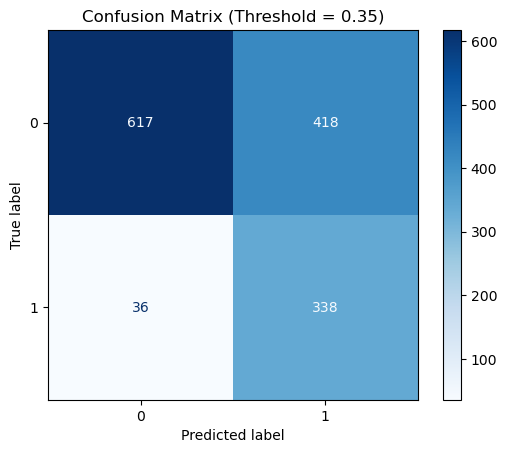

classification report:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1035
           1       0.45      0.90      0.60       374

    accuracy                           0.68      1409
   macro avg       0.70      0.75      0.66      1409
weighted avg       0.81      0.68      0.70      1409




In [27]:
threshold = 0.35
y_pred_custom = (y_prob_lr>=threshold).astype(int)

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_num, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Threshold = 0.35)')
plt.show()

print(f"classification report:\n{classification_report(y_test_num, y_pred_custom)}\n")

## ROC Curve Analysis

The ROC curve evaluates model performance across all classification thresholds by comparing the true positive rate and false positive rate.  
The AUC score summarizes the model’s ability to distinguish between churned and non-churned customers.


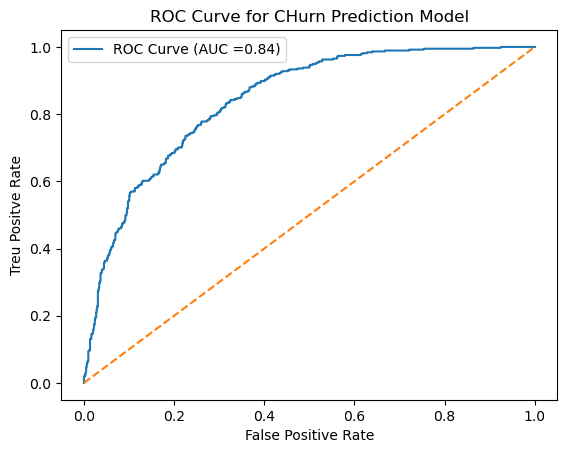

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_num, y_prob_lr)
auc_score = roc_auc_score(y_test_num, y_prob_lr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC ={auc_score:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("Treu Positve Rate")
plt.title("ROC Curve for CHurn Prediction Model")
plt.legend()
plt.show()

## Feature Importance Analysis


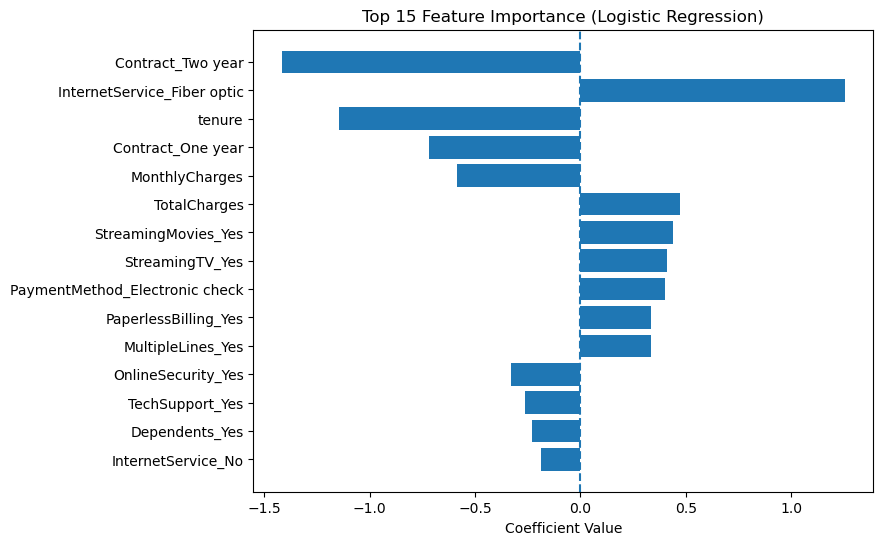

In [29]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_reg.coef_[0]})
top_features = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index).head(15)

plt.figure(figsize=(8,6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.axvline(0, linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

### Feature Importance Interpretation

This plot shows the most influential features affecting customer churn based on the Logistic Regression model coefficients.

- Features with **positive coefficients** increase the likelihood of customer churn.
- Features with **negative coefficients** decrease the likelihood of churn.
- The **magnitude** of each coefficient represents the strength of its impact on the prediction.
- Displaying only the top features improves interpretability and highlights key drivers of churn.

Such insights can help businesses focus on critical factors influencing customer retention and design targeted intervention strategies.


## Conclusion

In this project, a machine learning-based customer churn prediction system was developed using the Telco Customer Churn dataset.

- Data preprocessing and feature engineering were performed to prepare the dataset for modeling.
- A Logistic Regression model was trained to predict customer churn probabilities.
- Model evaluation focused on recall optimization through probability threshold tuning, selecting a threshold of 0.35 to better identify churn-prone customers.
- Performance was assessed using confusion matrix analysis and ROC-AUC evaluation.
- Feature importance analysis provided interpretability and highlighted key factors influencing customer churn.

This project demonstrates the practical application of supervised machine learning for solving real-world business problems and supports data-driven decision-making for customer retention.
